In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/samuele/University/2.DM2/DataMining-2/fma_metadata/')
import utils

from collections import defaultdict
from IPython.display import display

# Data Preparation

In [15]:
feat = utils.load('/Users/samuele/University/2.DM2/fma_metadata/features.csv')
display(feat.shape)
display(feat.head())

(106574, 518)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [16]:
happiness = pd.read_csv('/Users/samuele/University/2.DM2/fma_metadata/song_happiness_labels.csv')
display(happiness.head())
display(happiness.shape)

,track_id,valence
0,2,happy
1,3,sad
2,5,happy
3,10,happy
4,134,happy


(13129, 2)

In [17]:
feat = feat.merge(happiness, on='track_id')
display(feat['valence'].value_counts())
display(feat.shape)
display(feat.head())

/Users/samuele/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (3 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


sad      7724
happy    5405
Name: valence, dtype: int64

(13129, 520)

,track_id,"(chroma_cens, kurtosis, 01)","(chroma_cens, kurtosis, 02)","(chroma_cens, kurtosis, 03)","(chroma_cens, kurtosis, 04)","(chroma_cens, kurtosis, 05)","(chroma_cens, kurtosis, 06)","(chroma_cens, kurtosis, 07)","(chroma_cens, kurtosis, 08)","(chroma_cens, kurtosis, 09)",...,"(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)",valence
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448,happy
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330,sad
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861,happy
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800,happy
4,134,0.918445,0.674147,0.577818,1.281117,0.933746,0.078177,1.199204,-0.175223,0.925482,...,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623,happy


# Data Partitioning

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [21]:
class_name = 'valence'
attributes = [col for col in feat.columns if col != class_name]
X = feat[attributes].values
y = feat[class_name]

X_develop, X_test, y_develop, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

/Users/samuele/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [22]:
X_train.shape

(9190, 519)

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [32]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [54]:
param_list = { 
                'max_depth': [None] + list(np.arange(2, 20)),
                'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
                'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
                'criterion': ['gini', 'entropy'], 
             }

clf = RandomForestClassifier()
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(clf, cv=skfold,  param_distributions=param_list, n_iter=20)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print(f"best parameters:\n{random_search.best_params_}")
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

best parameters:
{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 17, 'criterion': 'entropy'}
Accuracy 0.8877887788778878
F1-score [0.85470085 0.90860215]
              precision    recall  f1-score   support

       happy       0.92      0.80      0.85      1622
         sad       0.87      0.95      0.91      2317

    accuracy                           0.89      3939
   macro avg       0.89      0.87      0.88      3939
weighted avg       0.89      0.89      0.89      3939



In [55]:
print(random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]])
print(random_search.best_params_)

{'min_samples_split': 30, 'min_samples_leaf': 100, 'max_depth': 3, 'criterion': 'gini'}
{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 17, 'criterion': 'entropy'}


In [68]:
clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=10, max_depth=17, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8844884488448845
F1-score [0.84958678 0.90624356]
              precision    recall  f1-score   support

       happy       0.92      0.79      0.85      1622
         sad       0.87      0.95      0.91      2317

    accuracy                           0.88      3939
   macro avg       0.89      0.87      0.88      3939
weighted avg       0.89      0.88      0.88      3939



<ipython-input-71-bb44f2a6d3e1>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.yticks(y_ticks, np.array(attributes)[sorted_idx])


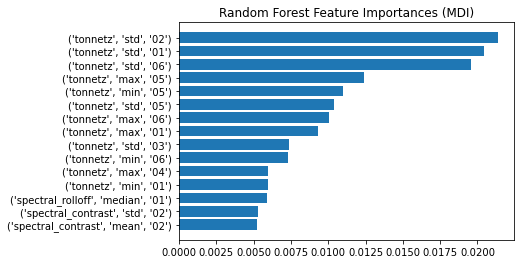

In [71]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [72]:
from sklearn.inspection import permutation_importance

In [75]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

<ipython-input-76-9d1047c37eda>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes)[sorted_idx])


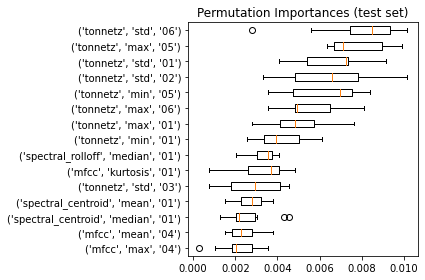

In [76]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [78]:
import pydotplus
from sklearn import tree
from IPython.display import Image

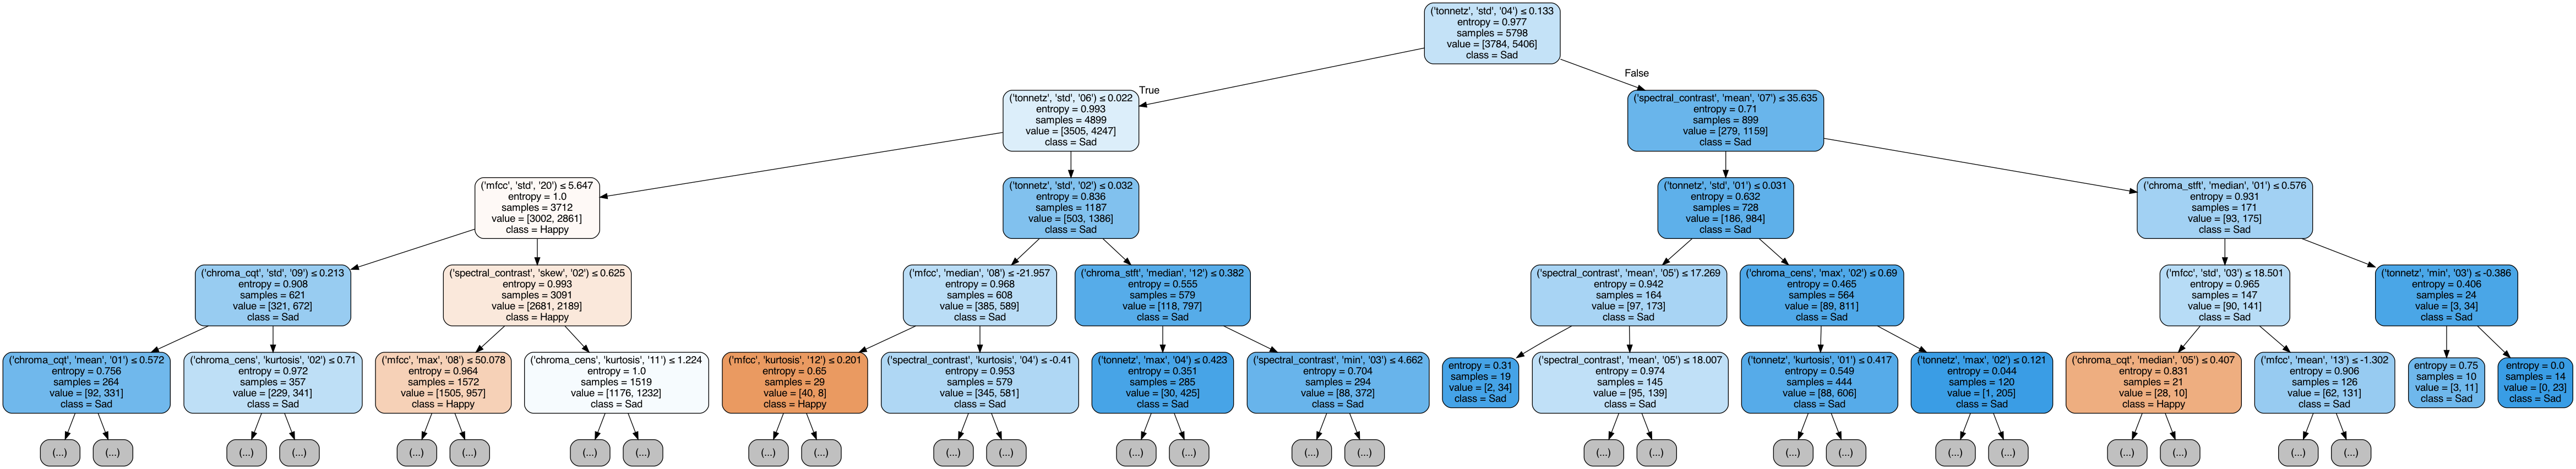

In [81]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                class_names=['Happy', 'Sad'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [82]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.706 +/- 0.027


# Bagging

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

In [37]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9918133442488744
F1-score [0.99481597 0.98054475]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1924
           1       0.99      0.97      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [38]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897666803110929
F1-score [0.99347088 0.97634816]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [39]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9934506753990995
F1-score [0.995842   0.98458574]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Boosting

In [40]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [41]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9950880065493246
F1-score [0.99688474 0.98839458]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           1.00      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       1.00      1.00      1.00      2443



In [42]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9930413426115432
F1-score [0.99558556 0.98357488]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443

